<a href="https://colab.research.google.com/github/ziqiveronica/ADS-Audit-Assessing-Performance-and-Fairness-in-Comment-Toxicity-Classification/blob/main/comment_toxicity_ads_audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv('/content/drive/MyDrive/rds_project/rds_train.csv')

Mounted at /content/drive


In [ ]:
train_data

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display data types of each column
print("Data Types:")
train_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual        

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399

In [ ]:
# Distribution of categorical data
print("\nValue Counts for categorical features:")
for column in train_data.select_dtypes(include=['object']).columns:
    print(f"\nDistribution in {column}:")
    print(train_data[column].value_counts())


Value Counts for categorical features:

Distribution in comment_text:
comment_text
Well said.                                                                                                                                                                                                                                                                184
No.                                                                                                                                                                                                                                                                       160
Exactly.                                                                                                                                                                                                                                                                  132
Yes.                                                                                                      

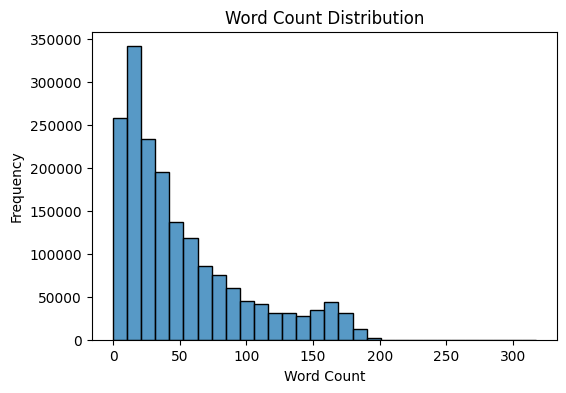

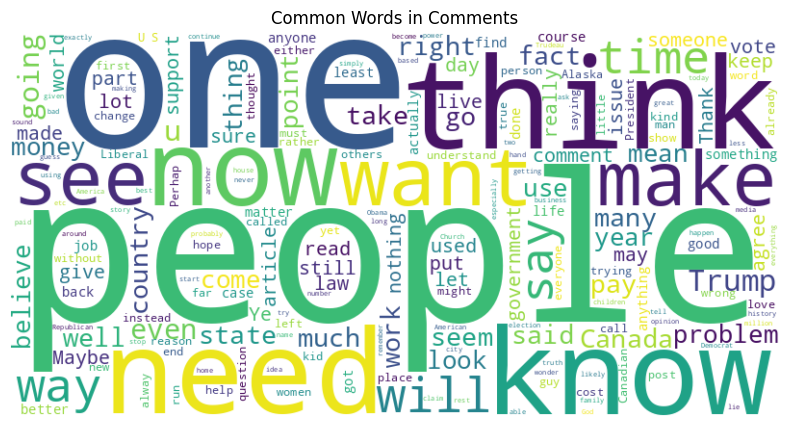

In [ ]:
from wordcloud import WordCloud
# Ensure all text data are strings
train_data['comment_text'] = train_data['comment_text'].fillna('').astype(str)

# Word count distribution
train_data['word_count'] = train_data['comment_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
sns.histplot(train_data['word_count'], bins=30)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


# Word cloud for overall toxicity comments
text = ' '.join(train_data['comment_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Comments')
plt.show()

In [ ]:
# Define low toxicity and high toxicity
low_toxicity = train_data[train_data['target'] < 0.5]['comment_text']
high_toxicity = train_data[train_data['target'] >= 0.5]['comment_text']

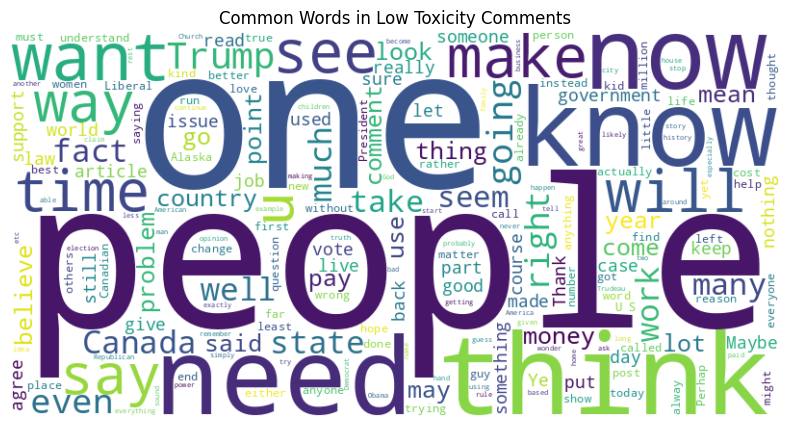

In [ ]:
# Word cloud for low toxicity comments
text = ' '.join(low_toxicity)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Low Toxicity Comments')
plt.show()

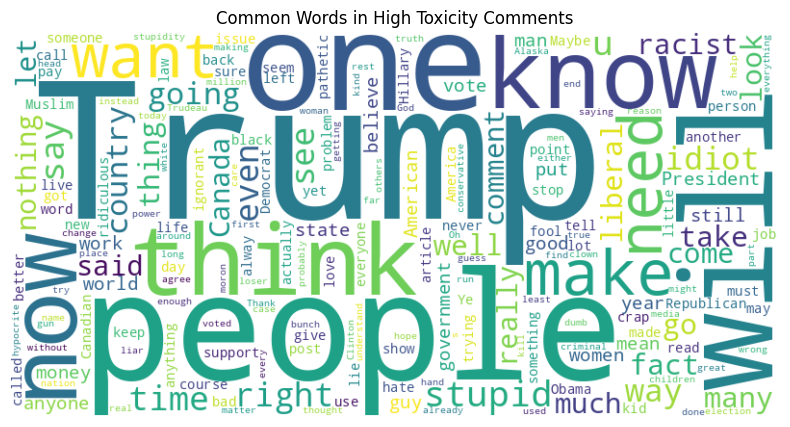

In [ ]:
# Word cloud for high toxicity comments
text = ' '.join(high_toxicity)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in High Toxicity Comments')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

high_toxicity_comments = train_data[train_data['target'] > 0.5]['comment_text']
vec = CountVectorizer(stop_words='english', max_features=100)
X = vec.fit_transform(high_toxicity_comments)
word_freq = dict(zip(vec.get_feature_names_out(), X.toarray().sum(axis=0)))
word_freq_sorted = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

print("\nTop words in high toxicity comments:")
for word, freq in list(word_freq_sorted.items())[:10]:
    print(f"{word}: {freq}")


Top words in high toxicity comments:
trump: 24096
people: 19633
like: 18187
just: 17842
stupid: 13243
don: 12550
think: 8204
white: 8135
right: 7975
know: 7897


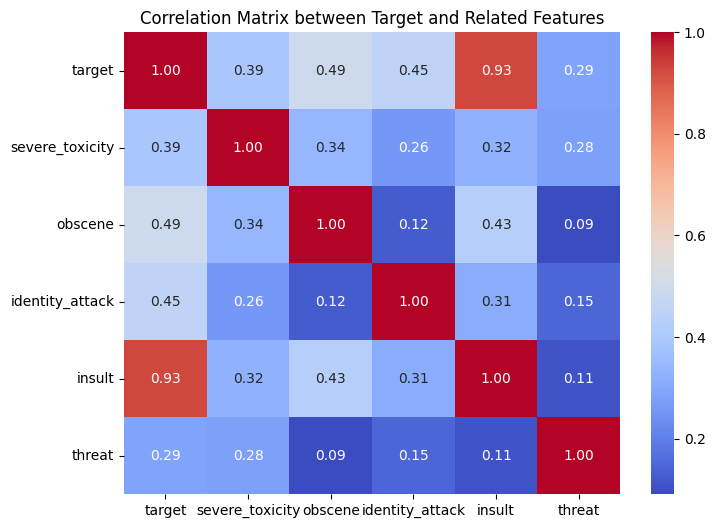

In [ ]:
# Examine relationships between 'target' and other numeric features
correlation_matrix = train_data[['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix between Target and Related Features')
plt.show()

In [ ]:
df = train_data

Text(0, 0.5, 'Frequency')

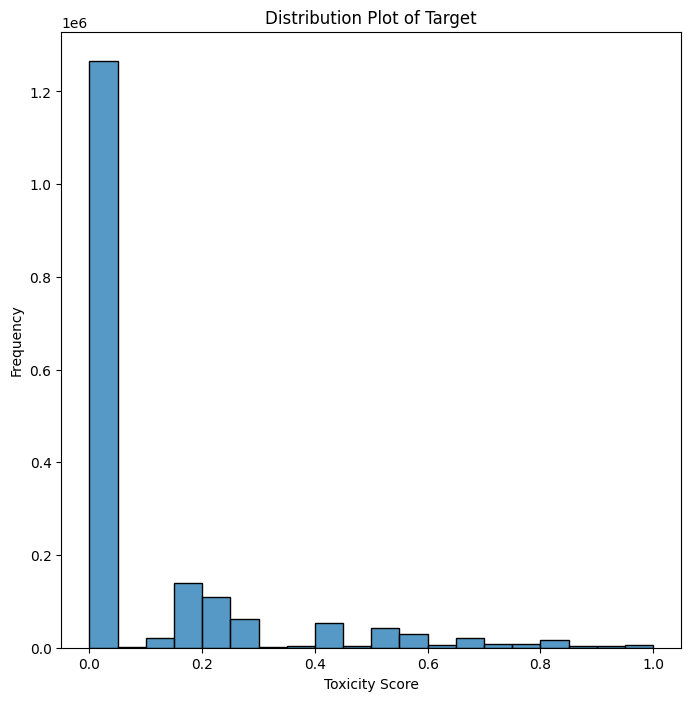

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.histplot(train_data['target'], bins=20, kde=False)
plt.title('Distribution Plot of Target')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')

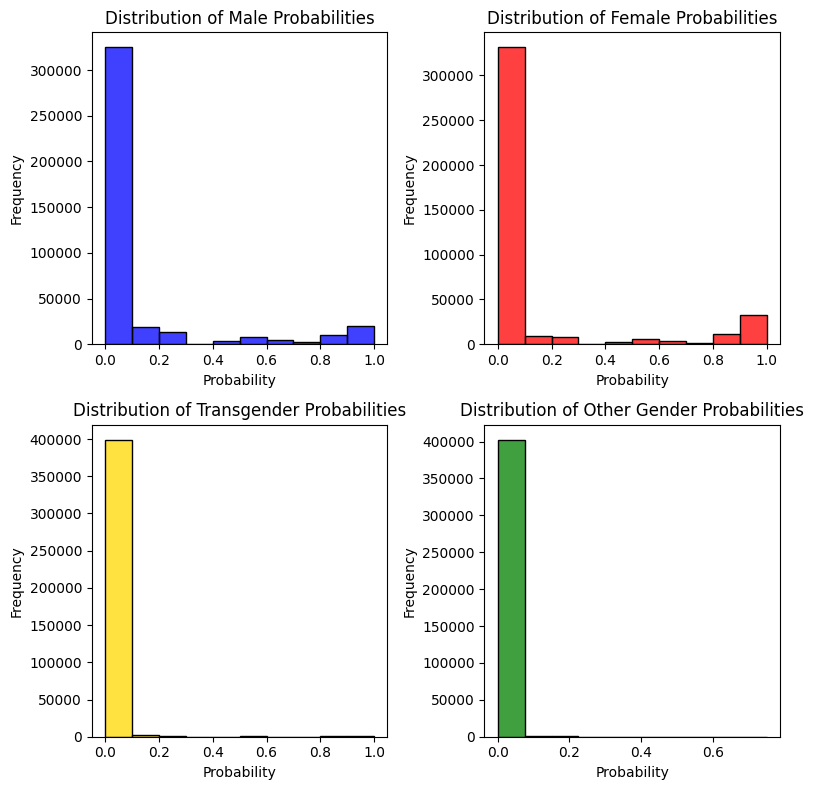

In [ ]:


plt.figure(figsize=(8, 8))

# Plotting the male probability distribution
plt.subplot(2, 2, 1)
sns.histplot(train_data['male'], bins=10, kde=False, color='blue')
plt.title('Distribution of Male Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Plotting the female probability distribution
plt.subplot(2, 2, 2)
sns.histplot(train_data['female'], bins=10, kde=False, color='red')
plt.title('Distribution of Female Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(train_data['transgender'], bins=10, kde=False, color='gold')
plt.title('Distribution of Transgender Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(train_data['other_gender'], bins=10, kde=False, color='green')
plt.title('Distribution of Other Gender Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

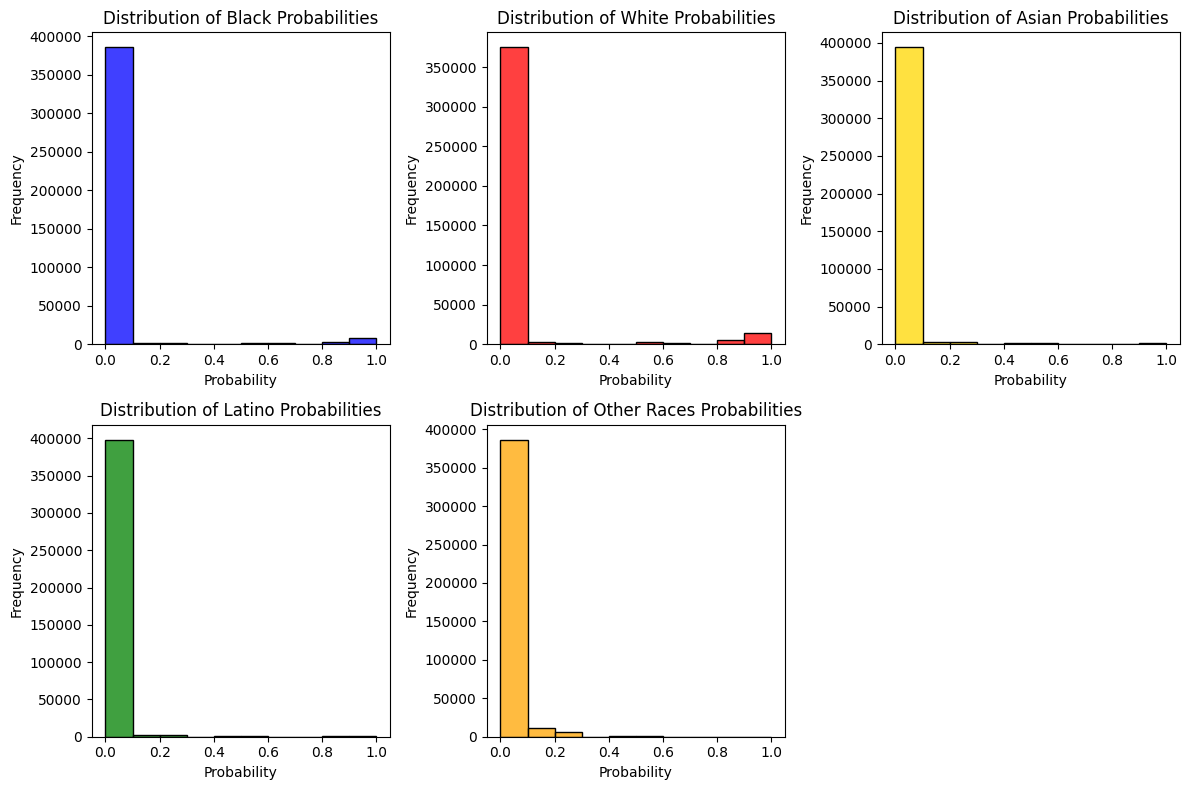

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(train_data['black'], bins=10, kde=False, color='blue')
plt.title('Distribution of Black Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(train_data['white'], bins=10, kde=False, color='red')
plt.title('Distribution of White Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(train_data['asian'], bins=10, kde=False, color='gold')
plt.title('Distribution of Asian Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(train_data['latino'], bins=10, kde=False, color='green')
plt.title('Distribution of Latino Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(train_data['other_race_or_ethnicity'], bins=10, kde=False, color='orange')
plt.title('Distribution of Other Races Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

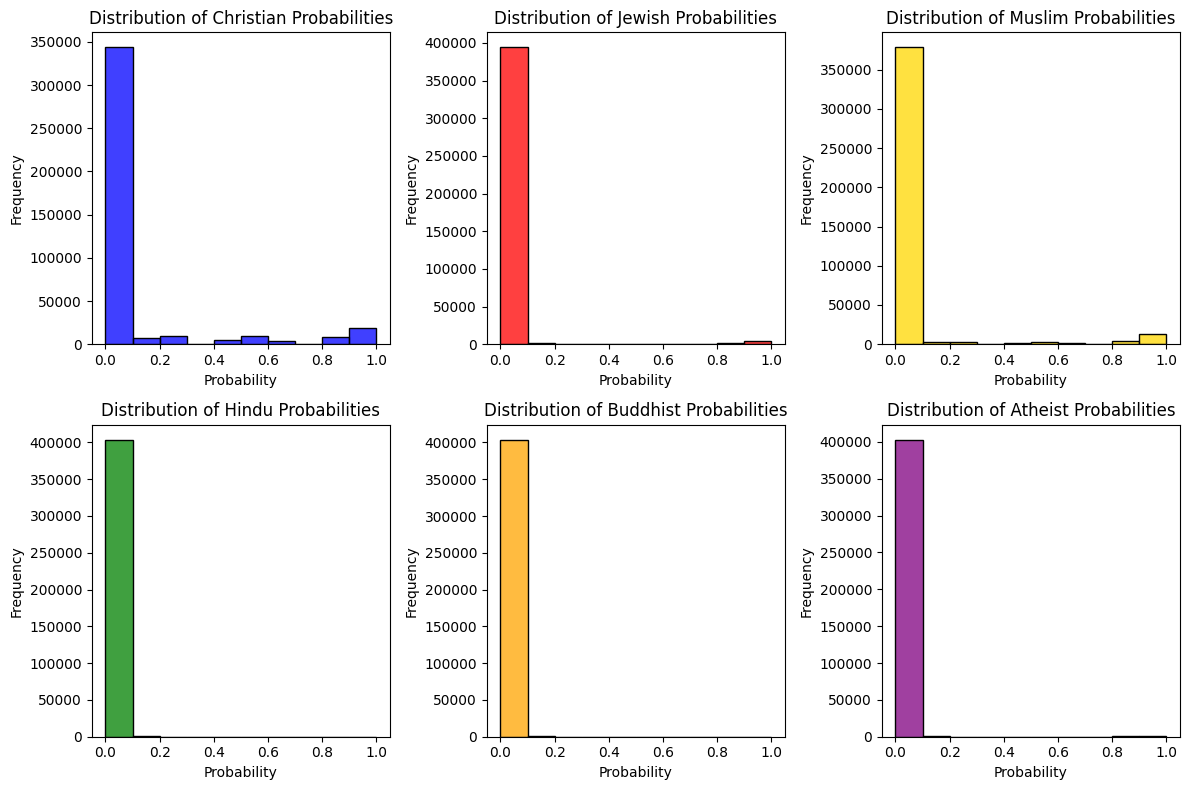

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(train_data['christian'], bins=10, kde=False, color='blue')
plt.title('Distribution of Christian Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(train_data['jewish'], bins=10, kde=False, color='red')
plt.title('Distribution of Jewish Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(train_data['muslim'], bins=10, kde=False, color='gold')
plt.title('Distribution of Muslim Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(train_data['hindu'], bins=10, kde=False, color='green')
plt.title('Distribution of Hindu Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(train_data['buddhist'], bins=10, kde=False, color='orange')
plt.title('Distribution of Buddhist Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(train_data['atheist'], bins=10, kde=False, color='purple')
plt.title('Distribution of Atheist Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

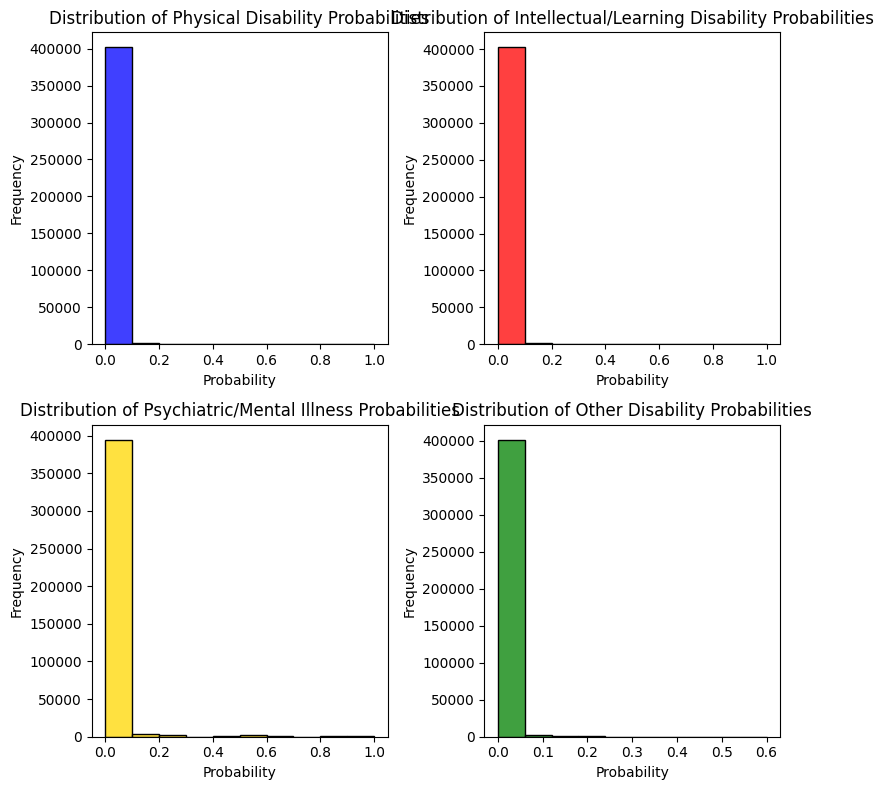

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.histplot(train_data['physical_disability'], bins=10, kde=False, color='blue')
plt.title('Distribution of Physical Disability Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(train_data['intellectual_or_learning_disability'], bins=10, kde=False, color='red')
plt.title('Distribution of Intellectual/Learning Disability Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(train_data['psychiatric_or_mental_illness'], bins=10, kde=False, color='gold')
plt.title('Distribution of Psychiatric/Mental Illness Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(train_data['other_disability'], bins=10, kde=False, color='green')
plt.title('Distribution of Other Disability Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

# Data Cleaning

In [ ]:
pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
test_private = pd.read_csv('/content/drive/MyDrive/rds_project/test_private_expanded.csv')
test_public = pd.read_csv('/content/drive/MyDrive/rds_project/test_public_expanded.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_private.head()

,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,...,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
0,7097320,[ Integrity means that you pay your debts.]\n\...,2017-09-13 20:12:01.484121+00,21,5945023.0,376974,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7097321,This is malfeasance by the Administrator and t...,2017-05-17 07:01:51.902566+00,55,NaN,335003,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...,2016-12-02 17:12:12.920957+00,54,649389.0,154126,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7097323,"Paul: Thank you for your kind words. I do, in...",2017-04-21 14:58:05.474657+00,13,5158666.0,328376,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7097324,Sorry you missed high school. Eisenhower sent ...,2017-10-01 19:43:12.373229+00,102,6061626.0,383983,approved,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_public.head()

,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,...,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
0,7000000,Jeff Sessions is another one of Trump's Orwell...,2017-01-26 07:37:38.422417+00,13,NaN,164149,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7000001,I actually inspected the infrastructure on Gra...,2016-12-03 20:38:21.204649+00,54,655260.0,154341,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7000002,No it won't . That's just wishful thinking on ...,2017-05-05 18:07:58.560078+00,21,5219683.0,332005,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7000003,Instead of wringing our hands and nibbling the...,2017-02-09 14:46:30.189044+00,13,NaN,167110,approved,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7000004,how many of you commenters have garbage piled ...,2016-10-15 01:18:40.521923+00,21,NaN,148484,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_private.shape

(97320, 45)

In [ ]:
test_public.shape

(97320, 45)

In [ ]:
common_ids = pd.merge(test_private, test_public, on='id', how='inner')

# Print the common IDs
print("Common IDs:")
print(common_ids)

# Optionally, to just get the list of IDs:
common_id_list = common_ids['id'].tolist()
print("List of Common IDs:")
print(common_id_list)

Common IDs:
Empty DataFrame
Columns: [id, comment_text_x, created_date_x, publication_id_x, parent_id_x, article_id_x, rating_x, funny_x, wow_x, sad_x, likes_x, disagree_x, toxicity_x, severe_toxicity_x, obscene_x, sexual_explicit_x, identity_attack_x, insult_x, threat_x, identity_annotator_count_x, toxicity_annotator_count_x, male_x, female_x, transgender_x, other_gender_x, heterosexual_x, homosexual_gay_or_lesbian_x, bisexual_x, other_sexual_orientation_x, christian_x, jewish_x, muslim_x, hindu_x, buddhist_x, atheist_x, other_religion_x, black_x, white_x, asian_x, latino_x, other_race_or_ethnicity_x, physical_disability_x, intellectual_or_learning_disability_x, psychiatric_or_mental_illness_x, other_disability_x, comment_text_y, created_date_y, publication_id_y, parent_id_y, article_id_y, rating_y, funny_y, wow_y, sad_y, likes_y, disagree_y, toxicity_y, severe_toxicity_y, obscene_y, sexual_explicit_y, identity_attack_y, insult_y, threat_y, identity_annotator_count_y, toxicity_annotat

In [ ]:
df_test = pd.concat([test_private, test_public])
df_test.head()

,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,...,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
0,7097320,[ Integrity means that you pay your debts.]\n\...,2017-09-13 20:12:01.484121+00,21,5945023.0,376974,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7097321,This is malfeasance by the Administrator and t...,2017-05-17 07:01:51.902566+00,55,NaN,335003,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...,2016-12-02 17:12:12.920957+00,54,649389.0,154126,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7097323,"Paul: Thank you for your kind words. I do, in...",2017-04-21 14:58:05.474657+00,13,5158666.0,328376,approved,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7097324,Sorry you missed high school. Eisenhower sent ...,2017-10-01 19:43:12.373229+00,102,6061626.0,383983,approved,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test = df_test[df_test['atheist'].notna()]
df_test.head()

,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,...,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
1,7097321,This is malfeasance by the Administrator and t...,2017-05-17 07:01:51.902566+00,55,NaN,335003,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...,2016-12-02 17:12:12.920957+00,54,649389.0,154126,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,7097335,IT IS DOA! As Collins announced her intentions...,2017-09-26 00:36:00.063263+00,21,NaN,381593,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,7097341,It's a black mark on the previous administrati...,2017-02-21 13:29:03.585950+00,54,1023688.0,169431,approved,0,0,0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,7097357,Don’t get it do you. As the price of things go...,2017-08-01 19:59:42.013163+00,54,5696163.0,361623,approved,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
race_mapping = {'asian': 1, 'black': 2, 'white': 3, 'latino': 4, 'other_race_or_ethnicity': 5}
religion_mapping = {'atheist':1, 'buddhist': 2, 'christian': 3, 'jewish': 4, 'muslim':5, 'hindu':6, 'other_religion': 7}
sex_mapping = {'male': 1, 'female': 2, 'transgender': 3,'other_gender': 4}
sexual_orient_mapping = {'heterosexual': 1, 'homosexual_gay_or_lesbian': 2, 'bisexual': 3, 'other_sexual_orientation': 4}
disability_mapping = {'physical_disability': 1, 'intellectual_or_learning_disability': 2, 'psychiatric_or_mental_illness': 3, 'other_disability': 4}

def map_columns(df, columns, mapping):
    max_scores = df[columns].max(axis=1)
    all_zeros = max_scores == 0
    max_columns = df[columns].idxmax(axis=1)
    mapped_values = max_columns.map(mapping)
    mapped_values[all_zeros] = 0
    return mapped_values

df_test['race'] = map_columns(df_test, list(race_mapping.keys()), race_mapping)
df_test['religion'] = map_columns(df_test, list(religion_mapping.keys()), religion_mapping)
df_test['sex'] = map_columns(df_test, list(sex_mapping.keys()), sex_mapping)
df_test['sexual_orientation'] = map_columns(df_test, list(sexual_orient_mapping.keys()), sexual_orient_mapping)
df_test['disability'] = map_columns(df_test, list(disability_mapping.keys()), disability_mapping)

df_test.drop(columns=list(race_mapping.keys()) + list(religion_mapping.keys()) + list(sex_mapping.keys()) + list(sexual_orient_mapping.keys()) + list(disability_mapping.keys()), inplace=True)

df_test

,id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,...,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count,race,religion,sex,sexual_orientation,disability
1,7097321,This is malfeasance by the Administrator and t...,2017-05-17 07:01:51.902566+00,55,NaN,335003,approved,0,0,0,...,0.0,0.1,0.0,4,10,0,0,0,0,0
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...,2016-12-02 17:12:12.920957+00,54,649389.0,154126,approved,0,0,0,...,0.0,0.2,0.0,4,10,0,0,0,0,0
15,7097335,IT IS DOA! As Collins announced her intentions...,2017-09-26 00:36:00.063263+00,21,NaN,381593,approved,0,0,0,...,0.0,0.0,0.0,4,4,0,0,0,0,0
21,7097341,It's a black mark on the previous administrati...,2017-02-21 13:29:03.585950+00,54,1023688.0,169431,approved,0,0,0,...,0.2,0.1,0.0,10,10,2,0,0,0,0
37,7097357,Don’t get it do you. As the price of things go...,2017-08-01 19:59:42.013163+00,54,5696163.0,361623,approved,0,0,0,...,0.0,0.0,0.0,4,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97291,7097291,There's opinions and there's lies . Shannyn pr...,2016-10-16 17:10:27.898600+00,21,NaN,148649,approved,0,0,0,...,0.1,0.3,0.0,10,10,2,0,2,0,0
97300,7097300,"1. Ok, I'll go out on a limb and we'll see whe...",2017-01-11 00:38:01.481477+00,53,820938.0,160831,approved,0,0,0,...,0.0,0.0,0.0,10,4,3,4,0,0,0
97306,7097306,"There are no cuts to Medicaid, the proposal i...",2017-07-03 23:26:13.726850+00,102,NaN,350511,approved,0,0,0,...,0.0,0.0,0.0,10,4,0,0,1,0,1
97310,7097310,"Domestic violence is a real issue, it needs at...",2017-04-13 07:11:45.864795+00,93,5125482.0,326444,approved,0,0,0,...,0.0,0.0,0.0,4,4,0,0,2,0,0


In [ ]:
# drop irrelevant columns
cols = ['created_date', 'publication_id', 'parent_id', 'article_id', 'funny', 'wow', 'sad', 'likes', 'disagree']
df_test = df_test.drop(columns=cols)
df_test

,id,comment_text,rating,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count,race,religion,sex,sexual_orientation,disability
1,7097321,This is malfeasance by the Administrator and t...,approved,0.1,0.0,0.0,0.0,0.0,0.1,0.0,4,10,0,0,0,0,0
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...,approved,0.3,0.0,0.0,0.0,0.0,0.2,0.0,4,10,0,0,0,0,0
15,7097335,IT IS DOA! As Collins announced her intentions...,approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0,0
21,7097341,It's a black mark on the previous administrati...,approved,0.2,0.0,0.0,0.0,0.2,0.1,0.0,10,10,2,0,0,0,0
37,7097357,Don’t get it do you. As the price of things go...,approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97291,7097291,There's opinions and there's lies . Shannyn pr...,approved,0.3,0.0,0.0,0.0,0.1,0.3,0.0,10,10,2,0,2,0,0
97300,7097300,"1. Ok, I'll go out on a limb and we'll see whe...",approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,4,3,4,0,0,0
97306,7097306,"There are no cuts to Medicaid, the proposal i...",approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,4,0,0,1,0,1
97310,7097310,"Domestic violence is a real issue, it needs at...",approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,2,0,0


In [ ]:
df_test.to_csv('test_cleaned.csv')

# Accuracy and Fairness Evaluation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from fairlearn.metrics import MetricFrame
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_absolute_error
from fairlearn.metrics import MetricFrame, demographic_parity_difference, demographic_parity_ratio, equalized_odds_difference, equalized_odds_ratio
from sklearn.metrics import confusion_matrix
from fairlearn.metrics import (selection_rate_difference, false_negative_rate_difference,
                               false_positive_rate_difference,
                               false_negative_rate, false_positive_rate)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/rds_project/test_output.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.drop(columns='Unnamed: 0')
df.head()

,id,comment_text,rating,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count,race,religion,sex,sexual_orientation,disability,pred,actual_label,predicted_label
0,7097321,This is malfeasance by the Administrator and t...,approved,0.1,0.0,0.0,0.0,0.0,0.1,0.0,4,10,0,0,0,0,0,0.323419,0,0
1,7097322,@ Rmiller101 - Spoken like a true elitist . Bu...,approved,0.3,0.0,0.0,0.0,0.0,0.2,0.0,4,10,0,0,0,0,0,0.720957,0,1
2,7097335,IT IS DOA ! As Collins announced her intention...,approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0,0,0.023541,0,0
3,7097341,It s a black mark on the previous administrati...,approved,0.2,0.0,0.0,0.0,0.2,0.1,0.0,10,10,2,0,0,0,0,0.326539,0,0
4,7097357,Don ’ t get it do you . As the price of things...,approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0,0,0.025575,0,0


In [ ]:
def false_negative_rate(y_true, y_pred):
    """Calculate the False Negative Rate (FNR)."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp) if (fn + tp) != 0 else 0

def false_positive_rate(y_true, y_pred):
    """Calculate the False Positive Rate (FPR)."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) != 0 else 0

def evaluate_fairness_all(df, y_true, y_pred, sensitive_feature):
    metric_dict1 = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1_Score': f1_score,
        'ROC_AUC_Score': roc_auc_score,
        'FNR': false_negative_rate,
        'FPR': false_positive_rate
    }
    metric_dict2 = {
        'false_negative_rate_difference': false_negative_rate_difference,
        'false_positive_rate_difference': false_positive_rate_difference,
        'demographic_parity_ratio': demographic_parity_ratio,
        'equalized_odds_ratio': equalized_odds_ratio,
        'selection_rate_difference': selection_rate_difference
    }
    sample_params = {metric: {'sensitive_features': df[sensitive_feature]} for metric in metric_dict2}

    metric_frame1 = MetricFrame(
        metrics=metric_dict1,
        y_true=y_true,
        y_pred=y_pred,
        sensitive_features=df[sensitive_feature]
    )
    metric_frame2 = MetricFrame(
        metrics=metric_dict2,
        y_true=y_true,
        y_pred=y_pred,
        sensitive_features=df[sensitive_feature],
        sample_params=sample_params
    )
    return {'classification_metrics': metric_frame1, 'fairness_metrics': metric_frame2}


In [ ]:
y_true = df['actual_label']
y_pred = df['predicted_label']

In [ ]:
features_to_evaluate = ['sex', 'race', 'sexual_orientation', 'religion', 'disability']
frame_dicts = {}
for feature in features_to_evaluate:
    frame_dicts[feature] = evaluate_fairness_all(df, y_true, y_pred, feature)
    print(f"--- {feature.upper()} ---")
    print("Classification Metrics Overall:")
    display(frame_dicts[feature]['classification_metrics'].overall)
    print("\nClassification Metrics By Group:")
    display(frame_dicts[feature]['classification_metrics'].by_group)
    print("\nFairness Metrics Overall:")
    display(frame_dicts[feature]['fairness_metrics'].overall)
    print("\n")


--- SEX ---
Classification Metrics Overall:


Accuracy         0.780126
Precision        0.333310
Recall           0.980458
F1_Score         0.497494
ROC_AUC_Score    0.867784
FNR              0.019542
FPR              0.244890
dtype: float64


Classification Metrics By Group:


,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Score,FNR,FPR
sex,,,,,,,
0,0.803468,0.327231,0.979788,0.490608,0.882201,0.020212,0.215385
1,0.720284,0.345899,0.982161,0.511616,0.828265,0.017839,0.325630
2,0.737315,0.343277,0.978408,0.508237,0.838443,0.021592,0.301522
3,0.606965,0.291480,1.000000,0.451389,0.765579,0.000000,0.468843
4,0.763889,0.423729,1.000000,0.595238,0.857143,0.000000,0.285714



Fairness Metrics Overall:


false_negative_rate_difference    0.021592
false_positive_rate_difference    0.253458
demographic_parity_ratio          0.521378
equalized_odds_ratio              0.459396
selection_rate_difference         0.265504
dtype: float64



--- RACE ---
Classification Metrics Overall:


Accuracy         0.780126
Precision        0.333310
Recall           0.980458
F1_Score         0.497494
ROC_AUC_Score    0.867784
FNR              0.019542
FPR              0.244890
dtype: float64


Classification Metrics By Group:


,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Score,FNR,FPR
race,,,,,,,
0,0.811397,0.327906,0.976930,0.491006,0.885665,0.023070,0.205600
1,0.776495,0.288136,0.965909,0.443864,0.861567,0.034091,0.242775
2,0.529591,0.390476,0.993939,0.560684,0.661305,0.006061,0.671329
3,0.497016,0.341737,0.991870,0.508333,0.656536,0.008130,0.678798
4,0.749020,0.265896,0.978723,0.418182,0.852213,0.021277,0.274298
5,0.743037,0.314770,0.977444,0.476190,0.844334,0.022556,0.288776



Fairness Metrics Overall:


false_negative_rate_difference    0.028030
false_positive_rate_difference    0.473198
demographic_parity_ratio          0.360872
equalized_odds_ratio              0.302888
selection_rate_difference         0.491337
dtype: float64



--- SEXUAL_ORIENTATION ---
Classification Metrics Overall:


Accuracy         0.780126
Precision        0.333310
Recall           0.980458
F1_Score         0.497494
ROC_AUC_Score    0.867784
FNR              0.019542
FPR              0.244890
dtype: float64


Classification Metrics By Group:


,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Score,FNR,FPR
sexual_orientation,,,,,,,
0,0.790689,0.333044,0.980051,0.497147,0.874194,0.019949,0.231662
1,0.585253,0.312500,0.952381,0.470588,0.724762,0.047619,0.502857
2,0.530367,0.341294,0.991329,0.507772,0.686319,0.008671,0.618692
3,0.802198,0.433333,0.928571,0.590909,0.853896,0.071429,0.220779
4,0.660256,0.300000,0.978261,0.459184,0.791762,0.021739,0.394737



Fairness Metrics Overall:


false_negative_rate_difference    0.062758
false_positive_rate_difference    0.397912
demographic_parity_ratio          0.437724
equalized_odds_ratio              0.356849
selection_rate_difference         0.399073
dtype: float64



--- RELIGION ---
Classification Metrics Overall:


Accuracy         0.780126
Precision        0.333310
Recall           0.980458
F1_Score         0.497494
ROC_AUC_Score    0.867784
FNR              0.019542
FPR              0.244890
dtype: float64


Classification Metrics By Group:


,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Score,FNR,FPR
religion,,,,,,,
0,0.800841,0.347558,0.980084,0.513144,0.879714,0.019916,0.220656
1,0.746377,0.188235,0.941176,0.313725,0.837384,0.058824,0.266409
2,0.733333,0.375000,1.000000,0.545455,0.841270,0.000000,0.317460
3,0.773582,0.276584,0.973535,0.430782,0.863911,0.026465,0.245713
4,0.621813,0.307292,0.991597,0.469185,0.769223,0.008403,0.453152
5,0.541007,0.322191,0.991247,0.486312,0.702933,0.008753,0.585381
6,0.750000,0.285714,0.888889,0.432432,0.811111,0.111111,0.266667
7,0.708455,0.335570,0.980392,0.500000,0.820676,0.019608,0.339041



Fairness Metrics Overall:


false_negative_rate_difference    0.111111
false_positive_rate_difference    0.364725
demographic_parity_ratio          0.447819
equalized_odds_ratio              0.376944
selection_rate_difference         0.372358
dtype: float64



--- DISABILITY ---
Classification Metrics Overall:


Accuracy         0.780126
Precision        0.333310
Recall           0.980458
F1_Score         0.497494
ROC_AUC_Score    0.867784
FNR              0.019542
FPR              0.244890
dtype: float64


Classification Metrics By Group:


,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Score,FNR,FPR
disability,,,,,,,
0,0.783221,0.328052,0.980647,0.491639,0.870119,0.019353,0.240408
1,0.762082,0.390476,1.000000,0.561644,0.859649,0.000000,0.280702
2,0.774059,0.578125,1.000000,0.732673,0.836364,0.000000,0.327273
3,0.669246,0.393829,0.964444,0.559278,0.775795,0.035556,0.412855
4,0.754167,0.313953,1.000000,0.477876,0.861502,0.000000,0.276995



Fairness Metrics Overall:


false_negative_rate_difference    0.035556
false_positive_rate_difference    0.172448
demographic_parity_ratio          0.596629
equalized_odds_ratio              0.582305
selection_rate_difference         0.216031
dtype: float64

### Visualization for Classification Metrics

<ipython-input-149-02e43b7f5b6c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Score', data=plot_df, palette=selected_palette)
<ipython-input-149-02e43b7f5b6c>:16: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  barplot = sns.barplot(x='Metric', y='Score', data=plot_df, palette=selected_palette)


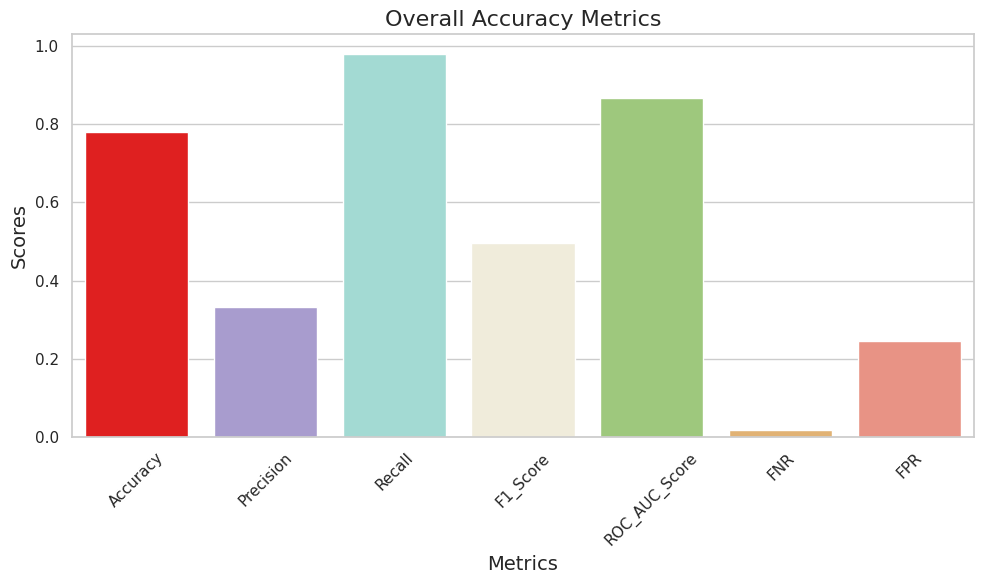

In [ ]:
plot_data = {'Feature': [], 'Metric': [], 'Score': []}

for feature, data in frame_dicts.items():
    metrics_overall = data['classification_metrics'].overall.to_dict()
    for metric, score in metrics_overall.items():
        plot_data['Feature'].append(feature)
        plot_data['Metric'].append(metric)
        plot_data['Score'].append(score)

plot_df = pd.DataFrame(plot_data)

sns.set(style="whitegrid")
selected_palette = ['red','#A494D6','#9AE3DA','#F3EED8','#9CD471','#F3B562','#F88774','#F06060']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Metric', y='Score', data=plot_df, palette=selected_palette)
plt.title('Overall Accuracy Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-206-4d2ebc5d450e>:34: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  barplot = sns.barplot(x='Metric', y='Score', hue='Group', data=plot_df, palette=selected_palette)


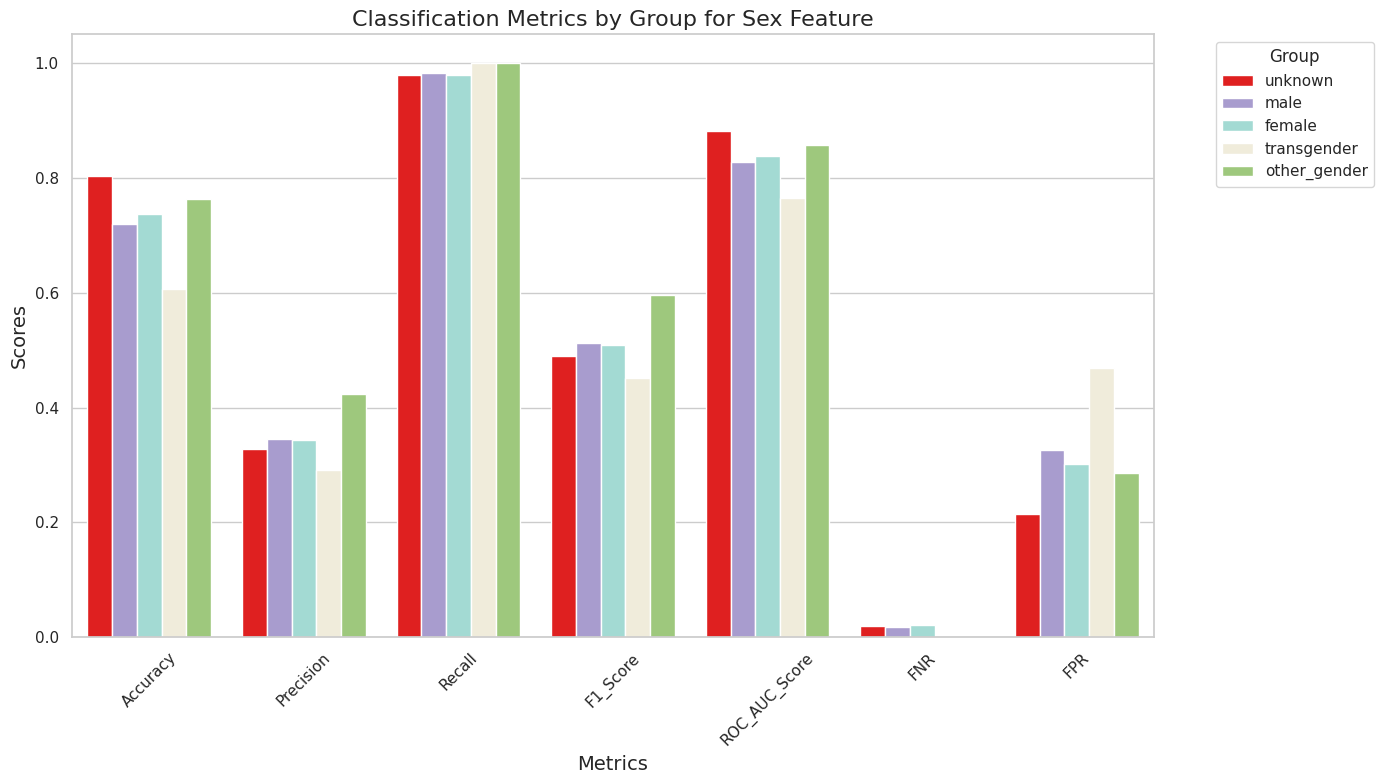

<ipython-input-206-4d2ebc5d450e>:34: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  barplot = sns.barplot(x='Metric', y='Score', hue='Group', data=plot_df, palette=selected_palette)


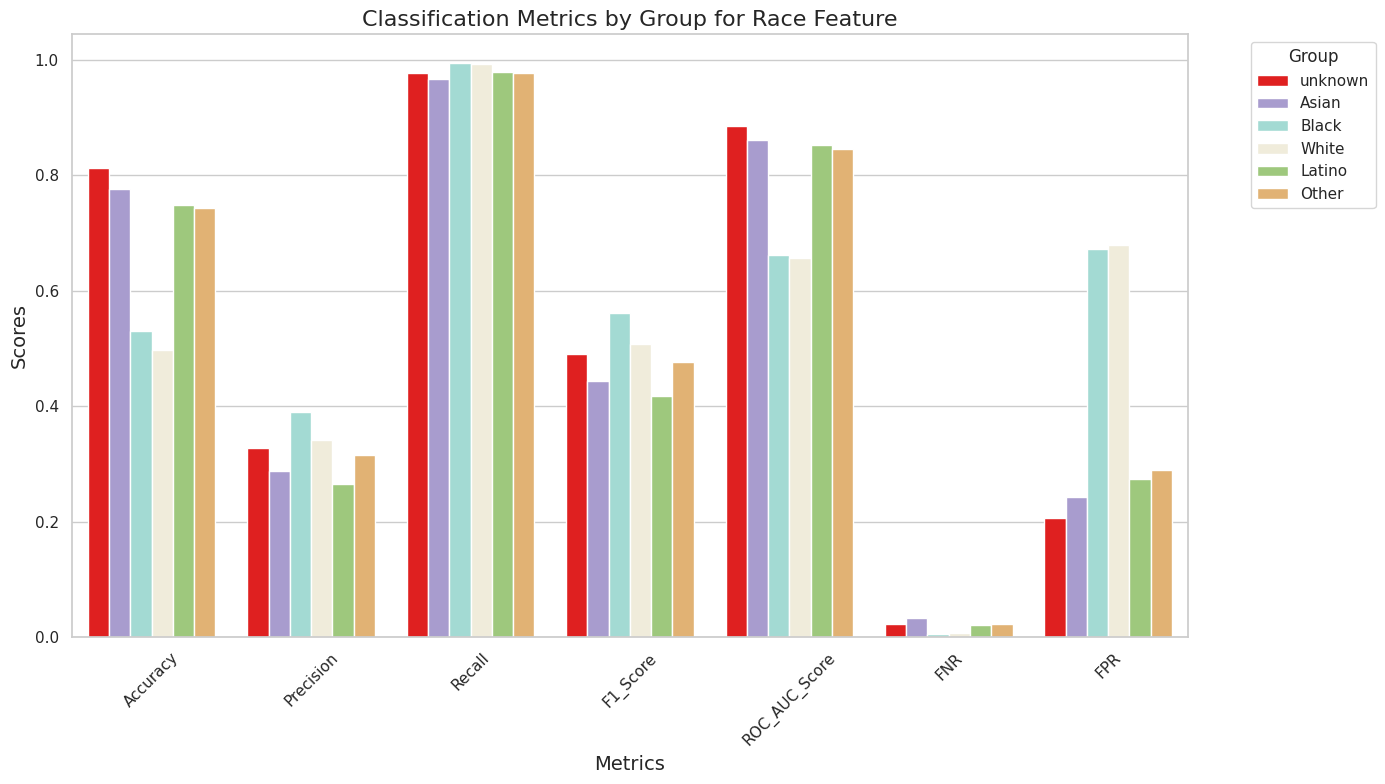

<ipython-input-206-4d2ebc5d450e>:34: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  barplot = sns.barplot(x='Metric', y='Score', hue='Group', data=plot_df, palette=selected_palette)


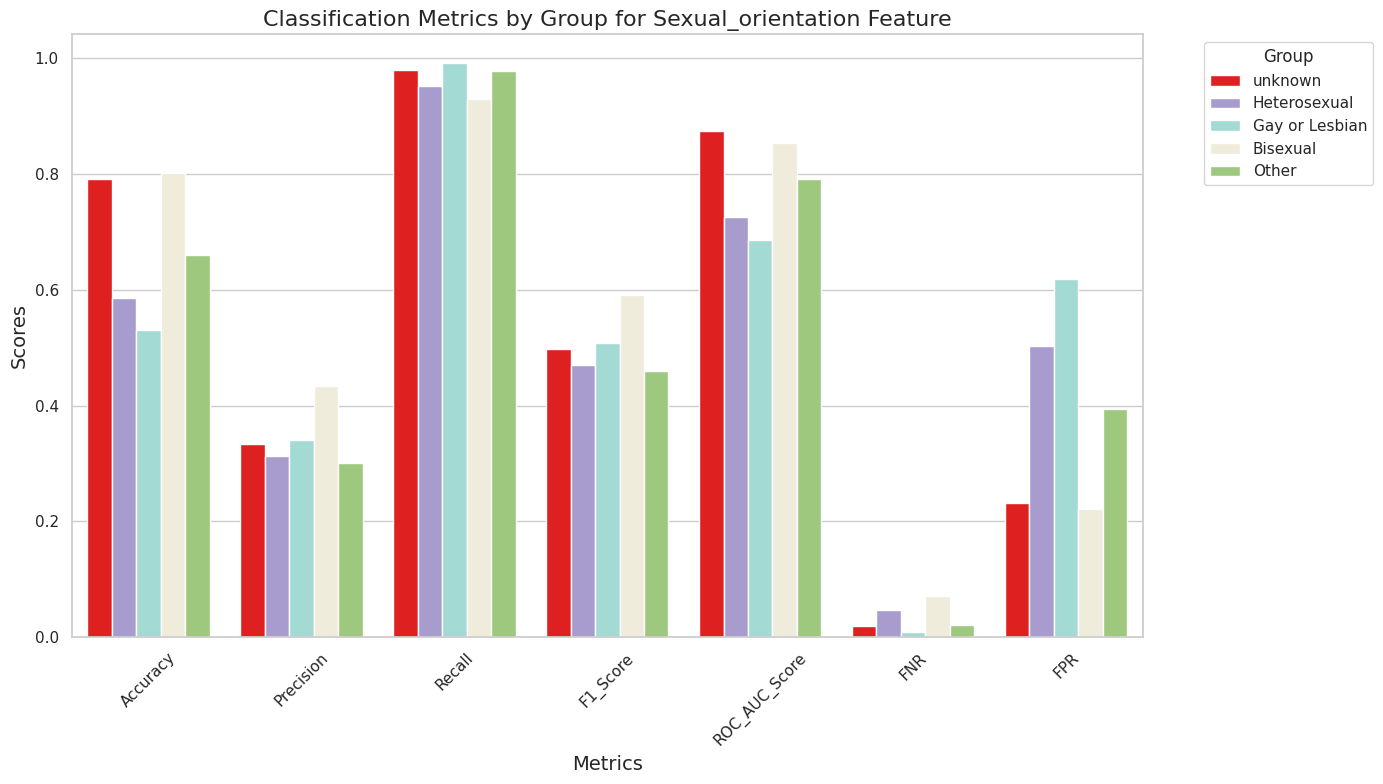

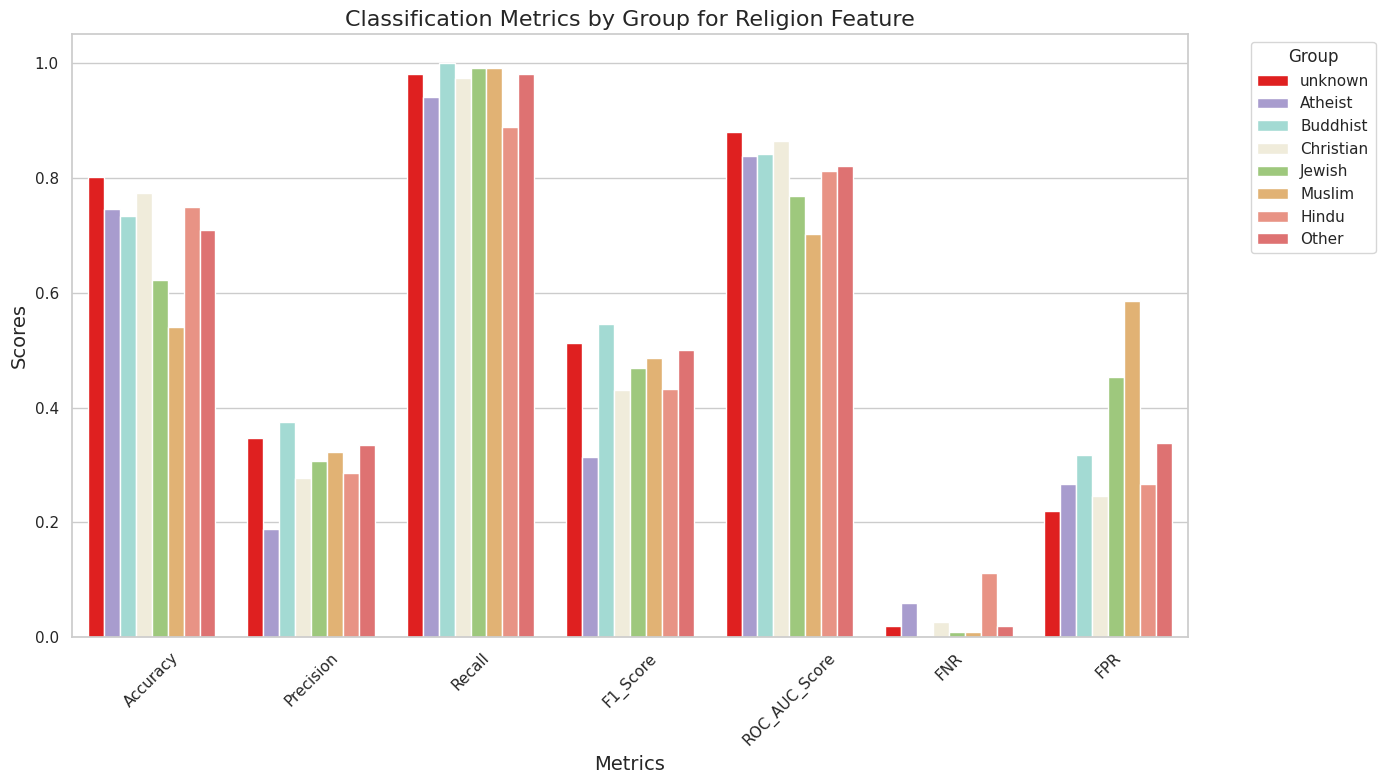

<ipython-input-206-4d2ebc5d450e>:34: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  barplot = sns.barplot(x='Metric', y='Score', hue='Group', data=plot_df, palette=selected_palette)


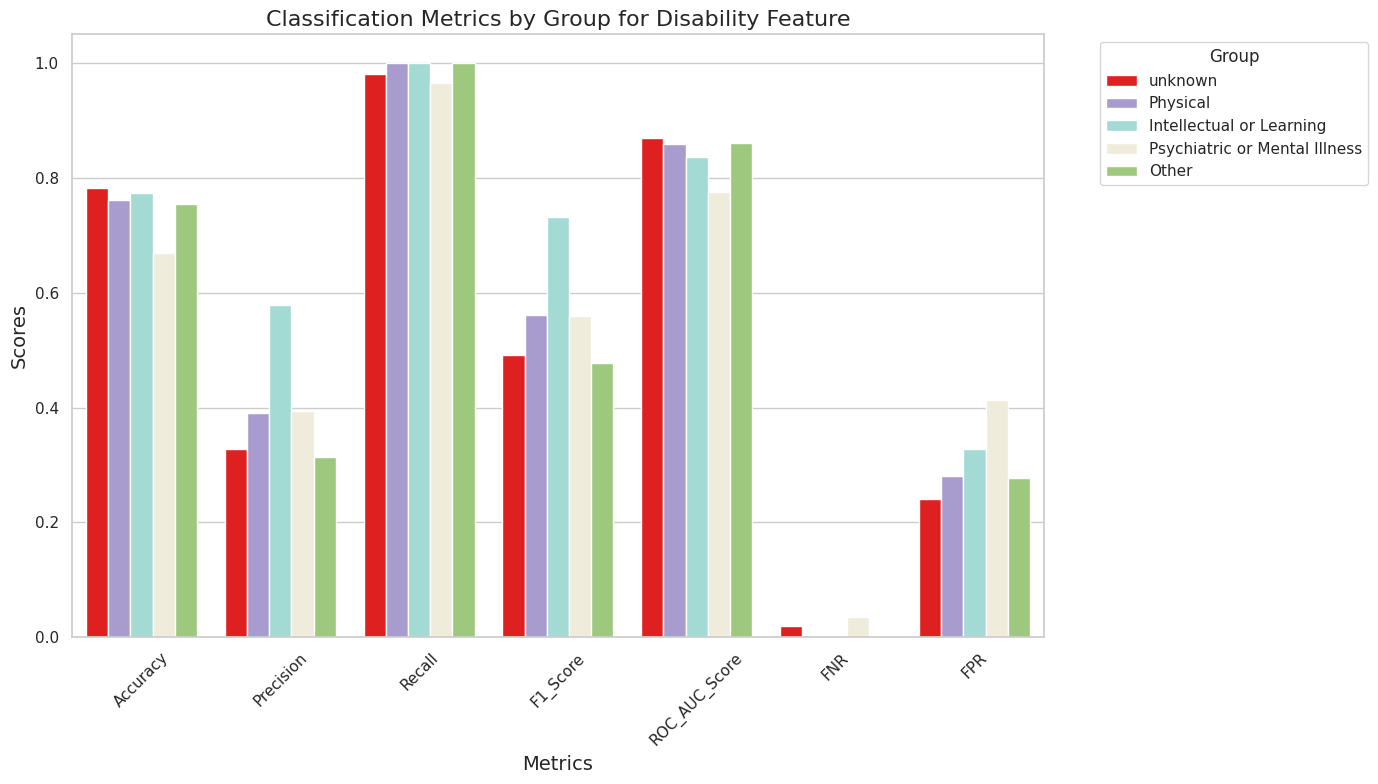

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mappings = {
    'sex': {1: 'male', 2: 'female', 3: 'transgender', 4: 'other_gender', 0: 'unknown'},
    'race': {1: 'Asian', 2: 'Black', 3: 'White', 4: 'Latino', 5: 'Other'},
    'sexual_orientation': {1: 'Heterosexual', 2: 'Gay or Lesbian', 3: 'Bisexual', 4: 'Other'},
    'religion': {1: 'Atheist', 2: 'Buddhist', 3: 'Christian', 4: 'Jewish', 5: 'Muslim', 6: 'Hindu', 7: 'Other'},
    'disability': {1: 'Physical', 2: 'Intellectual or Learning', 3: 'Psychiatric or Mental Illness', 4: 'Other'}
}

sns.set(style="whitegrid")

for feature, mapping in mappings.items():
    metrics_df = frame_dicts[feature]['classification_metrics'].by_group

    plot_data = {
        'Group': [],
        'Metric': [],
        'Score': []
    }

    for index, row in metrics_df.iterrows():
        group_label = mapping.get(index, 'unknown')
        for metric in metrics_df.columns:
            plot_data['Group'].append(group_label)
            plot_data['Metric'].append(metric)
            plot_data['Score'].append(row[metric])

    plot_df = pd.DataFrame(plot_data)

    plt.figure(figsize=(14, 8))
    barplot = sns.barplot(x='Metric', y='Score', hue='Group', data=plot_df, palette=selected_palette)

    plt.title(f'Classification Metrics by Group for {feature.capitalize()} Feature', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc=2)

    plt.tight_layout()
    plt.show()


### Visualization for Fairness Metrics

<ipython-input-114-e2eaf1d0c31a>:18: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  barplot_fairness = sns.barplot(x='Feature', y='Score', hue='Metric', data=fairness_plot_df, palette=selected_palette_fairness)


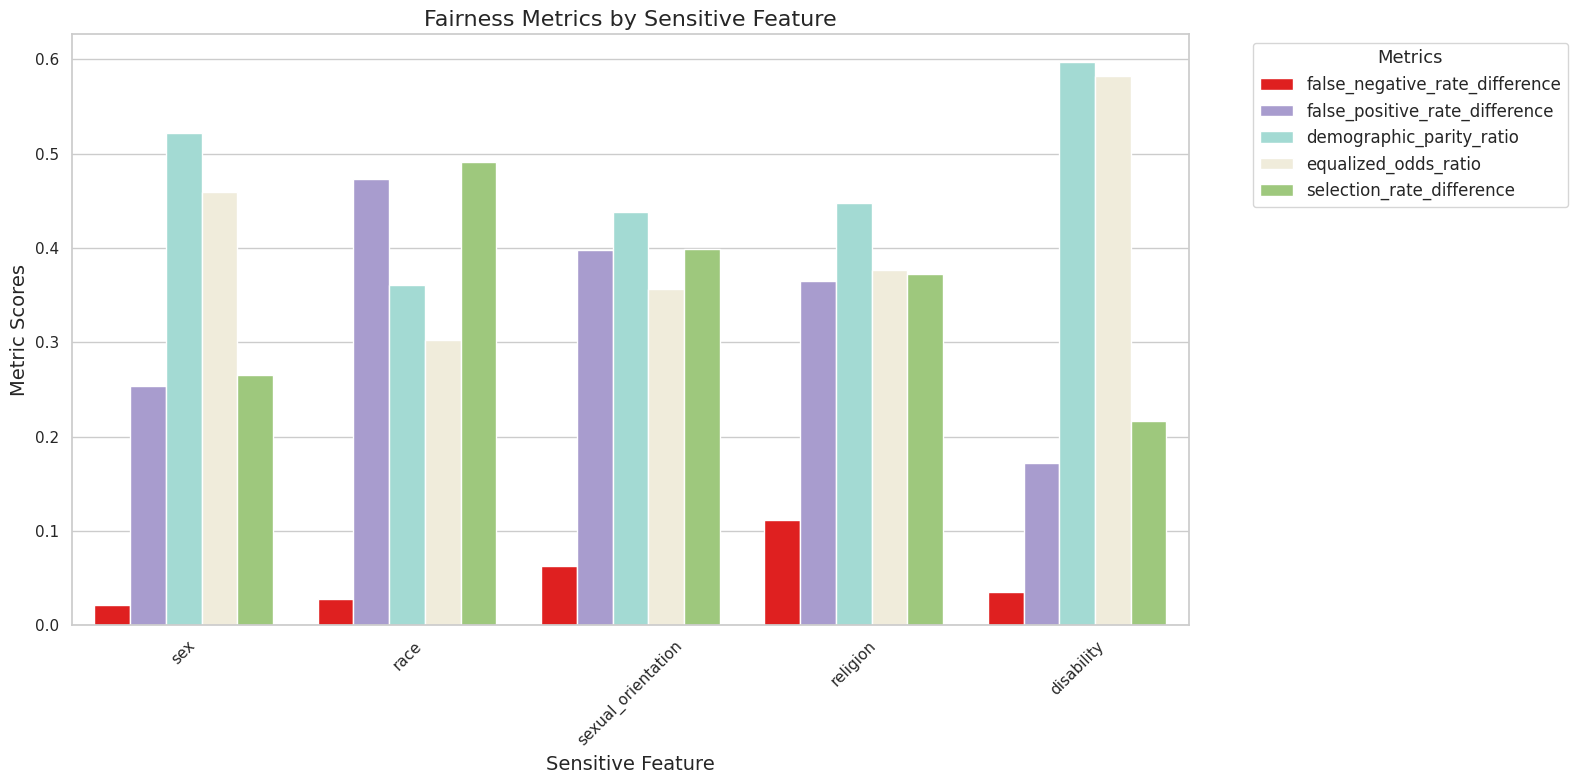

In [ ]:
fairness_plot_data = {'Feature': [], 'Metric': [], 'Score': []}

for feature, data in frame_dicts.items():
    fairness_overall = data['fairness_metrics'].overall.to_dict()
    for metric, score in fairness_overall.items():
        fairness_plot_data['Feature'].append(feature)
        fairness_plot_data['Metric'].append(metric)
        fairness_plot_data['Score'].append(score)

fairness_plot_df = pd.DataFrame(fairness_plot_data)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
selected_palette_fairness = ['red','#A494D6','#9AE3DA','#F3EED8','#9CD471','#F3B562','#F88774','#F06060']

plt.figure(figsize=(16, 8))
barplot_fairness = sns.barplot(x='Feature', y='Score', hue='Metric', data=fairness_plot_df, palette=selected_palette_fairness)

plt.title('Fairness Metrics by Sensitive Feature', fontsize=16)
plt.xlabel('Sensitive Feature', fontsize=14)
plt.ylabel('Metric Scores', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', title_fontsize=13, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Stability Analysis
### Population Stability Index (PSI)

PSI Value: 0.0004679388387301154


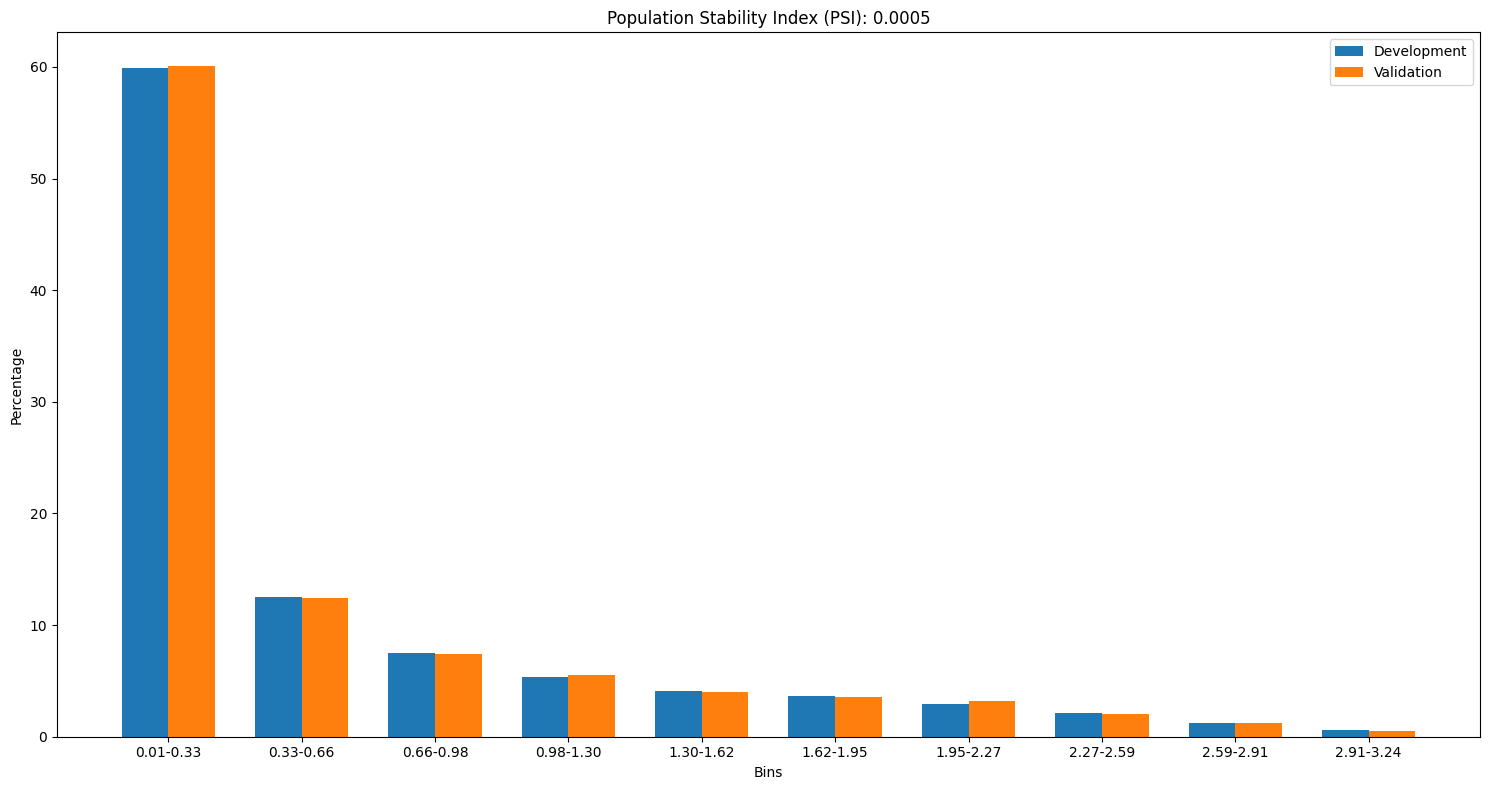

In [ ]:
def population_stability_index(dev_data, val_data, col_name, num_bins=10):
    bins = np.linspace(dev_data[col_name].min(), dev_data[col_name].max(), num_bins + 1)

    dev_data['bin'] = pd.cut(dev_data[col_name], bins=bins, include_lowest=True)
    val_data['bin'] = pd.cut(val_data[col_name], bins=bins, include_lowest=True)

    dev_group = dev_data.groupby('bin')[col_name].count().reset_index(name='dev_count')
    val_group = val_data.groupby('bin')[col_name].count().reset_index(name='val_count')

    merged_counts = dev_group.merge(val_group, on='bin', how='left')

    merged_counts['dev_pct'] = (merged_counts['dev_count'] / len(dev_data)) + 1e-10
    merged_counts['val_pct'] = (merged_counts['val_count'] / len(val_data)) + 1e-10

    merged_counts['psi'] = (merged_counts['val_pct'] - merged_counts['dev_pct']) * np.log(merged_counts['val_pct'] / merged_counts['dev_pct'])

    return merged_counts['psi'].sum()

def prepare_data_for_plotting(dev_data, val_data, col_name, num_bins=10):
    bins = np.linspace(dev_data[col_name].min(), dev_data[col_name].max(), num_bins + 1)
    dev_data['bin'] = pd.cut(dev_data[col_name], bins=bins, include_lowest=True)
    val_data['bin'] = pd.cut(val_data[col_name], bins=bins, include_lowest=True)
    dev_group = dev_data.groupby('bin')[col_name].count().reset_index(name='dev_count')
    val_group = val_data.groupby('bin')[col_name].count().reset_index(name='val_count')
    merged_counts = dev_group.merge(val_group, on='bin', how='left')
    merged_counts['dev_pct'] = merged_counts['dev_count'] / len(dev_data) * 100
    merged_counts['val_pct'] = merged_counts['val_count'] / len(val_data) * 100
    return merged_counts

def plot_psi(dev_data, val_data, psi_value, col_name):
    plot_data = prepare_data_for_plotting(dev_data, val_data, col_name)
    fig, ax = plt.subplots(figsize=(15, 8))
    index = np.arange(len(plot_data))
    bar_width = 0.35
    dev_bars = ax.bar(index, plot_data['dev_pct'], bar_width, label='Development')
    val_bars = ax.bar(index + bar_width, plot_data['val_pct'], bar_width, label='Validation')
    ax.set_xlabel('Bins')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Population Stability Index (PSI): {psi_value:.4f}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(plot_data['bin'].apply(lambda x: f"{x.left:.2f}-{x.right:.2f}"))
    ax.legend()
    fig.tight_layout()
    plt.show()

dev_data = df.sample(frac=0.7, random_state=42)
val_data = df.drop(dev_data.index)

psi_value = population_stability_index(dev_data, val_data, 'pred')
print(f"PSI Value: {psi_value}")

plot_psi(dev_data, val_data, psi_value, 'pred')

# Performance on Marginal Predictions

In [ ]:
margin_df = df[(df['pred'] >= 0.4) & (df['pred'] <= 0.6)]
margin_df.head()

,id,comment_text,rating,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count,race,religion,sex,sexual_orientation,disability,pred,actual_label,predicted_label
11,7097380,"Well , it appears the staff needs trashing . I...",approved,0.2,0.0,0.0,0.0,0.0,0.2,0.0,6,10,0,3,0,0,0,0.451045,0,0
18,7097422,This woman fails to address many of the concer...,approved,0.3,0.1,0.1,0.1,0.3,0.1,0.1,10,10,0,5,2,2,0,0.485183,0,0
22,7097446,"Well , let us see : what party was the preside...",approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,4,0,1,2,0,0,0.550903,0,1
27,7097477,Pro - Sharia DNC embraces this anti - Semitic ...,rejected,0.2,0.0,0.0,0.0,0.1,0.1,0.0,4,10,0,0,0,0,0,0.407060,0,0
63,7097630,"Hello ElRey , In no place in my post did I voi...",approved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0,0,0.507855,0,1


In [ ]:
from sklearn.metrics import classification_report

print("Performance on marginal cases:")
print("Accuracy:", accuracy_score(margin_df['actual_label'], margin_df['predicted_label']))
print(classification_report(margin_df['actual_label'], margin_df['predicted_label']))

Performance on marginal cases:
Accuracy: 0.5412844036697247
              precision    recall  f1-score   support

           0       0.97      0.54      0.69      3055
           1       0.04      0.59      0.08       106

    accuracy                           0.54      3161
   macro avg       0.51      0.57      0.39      3161
weighted avg       0.94      0.54      0.67      3161



### Visualization

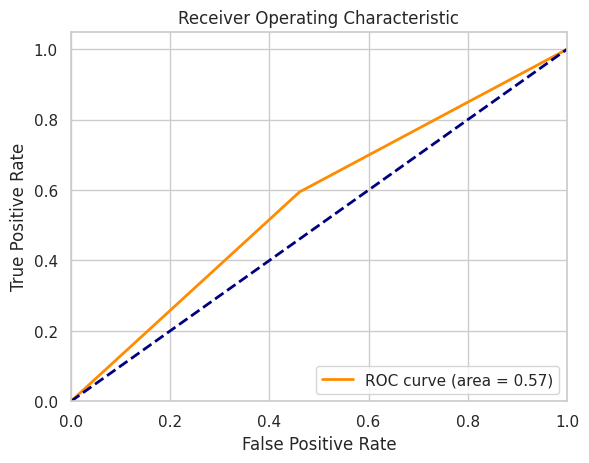

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, _ = roc_curve(margin_df['actual_label'], margin_df['predicted_label'])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
